In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [57]:
# 全局设置一下字体,以支持中文
plt.rcParams['font.family']='SimHei' #字体
plt.rcParams['font.size'] =11 # 调整字体大小

In [58]:
# mpl.font_manager.FontManager().ttflist

## 关于等额本金和等额本息房贷的计算，考虑提前还贷

房贷可能是很多普通人一辈子最大的贷款，国内的房贷有两种还款方式可以选择（等额本金和等额本息）， 
我相信很多人和我一样，正常情况下，就是随便拿房贷计算器算了一下每月的月供，然后就选了。  
这两种还款方式对比起来其实也很好选。等额本金的总利息少一点，但是前期的月供比较高，后期逐渐减少
等额本息的总利息比较多，每个月的还款数额是一样的，前期的还款压力小。  
选择的思路也很简单，月供都没有压力的情况下，选择等额本金，因为总的利息最少。  
还有就是还贷时间的选择，这个是时间越久利息越多，所以也是看你的还款能力。  
相信大部分人都是拉到最大30年，虽然利息会变多，但是你可以提前还贷。。  
现在的房价来说，就算拉到30年的房贷，月供都比平均工资要高很多  

以杭州的房价为例，刚需房在3万一平，总价300万，假设我们首付100万，商业贷款200万，等额本息的情况下月供大约10000，而杭州的平均工资，统计出来的才5000多  
这下两个平均工资的人不吃不喝才刚好能还上房贷。而平均工资还是比中位数高的，中位数才能反应大多数人的收入，所以很多人应该是买不了这个刚需房的。  
就连攒够首付的100万，大部分年轻人，还得靠父母支持一下。  
算了一下感觉还是很离谱的
其实还有偏一点的房子2万多，200多万的，假设我们贷100多万，等额本息就是五六千月供，似乎是一般家庭也还得起了。  

其实贷款还可以用公积金，还有组合贷款这种，因为只会让问题复杂化，所以先就不考虑了。  
本质上公积金贷款只是利率低一点而已，现在lpr的利率已经到4.3了，比公积金也没高太多(1%)。  
总体来说还是有很多东西可以计算的。


In [59]:
import mortgageCalc
eppList50 = mortgageCalc.MortgageCalc(
    50*10000).calc_equal_principal_payment_monthly_list()
eppList100 = mortgageCalc.MortgageCalc(
    100*10000).calc_equal_principal_payment_monthly_list()

elpList50=mortgageCalc.MortgageCalc(
    50*10000).calc_equal_loan_payment_monthly_list()
elpList100 = mortgageCalc.MortgageCalc(
    100*10000).calc_equal_loan_payment_monthly_list()






先看一下还款曲线热身,回顾一下matplotlib,pandas的使用  
我们发现,两种贷款的还款曲线,都是线性的  
曲线和横坐标之间的面积,就是还款总额,两种贷款之间面积的差值是两个直线相交形成三角形面积的差值.  
很明显就能看出来等额本金的总额(交线左边的三角形面积更小)更少一些


Text(0, 0.5, '还款金额')

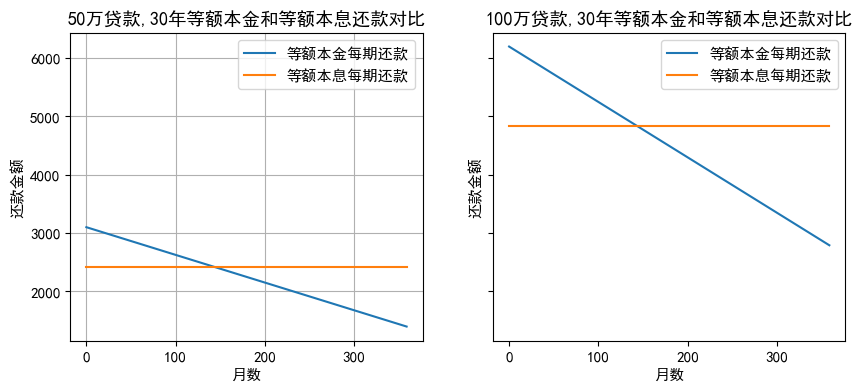

In [60]:

eppList50df=pd.DataFrame(eppList50)
elpList50df=pd.DataFrame(elpList50)
fig,axs=plt.subplots(1,2,sharey=True)
fig.set_size_inches(10,4)
# fig.set_dpi(200)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs[0].plot(eppList50df['本期还款'],label='等额本金每期还款')
axs[0].plot(elpList50df['本期还款'],label='等额本息每期还款')
axs[0].legend()
axs[0].set_title('50万贷款,30年等额本金和等额本息还款对比')
axs[0].set_xlabel('月数')
axs[0].set_ylabel('还款金额')
axs[0].grid()

eppList100df=pd.DataFrame(eppList100)
elpList100df=pd.DataFrame(elpList100)
axs[1].plot(eppList100df['本期还款'],label='等额本金每期还款')
axs[1].plot(elpList100df['本期还款'],label='等额本息每期还款')
axs[1].legend()
axs[1].set_title('100万贷款,30年等额本金和等额本息还款对比')
axs[1].set_xlabel('月数')
axs[1].set_ylabel('还款金额')



先来绘制一个贷款按照贷款年份变化的曲线，  
因为以前似乎有专家建议说把贷款年限延缓到40年的言论，  
正好可以验证一下

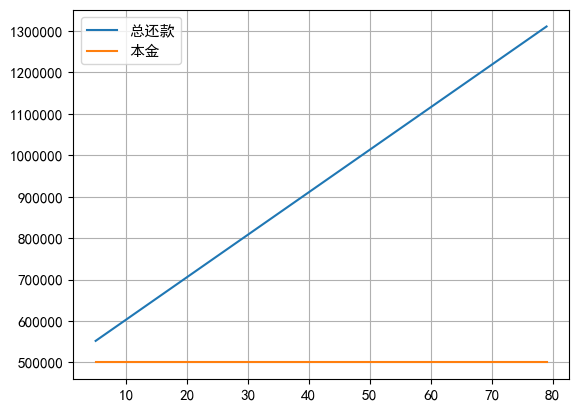

In [61]:

mYearList50=map(lambda x: mortgageCalc.MortgageCalc(
    50*10000,year=x).epp_info(),range(5,80))
# plt.plot(mYearList50)
mYearList50df=pd.DataFrame(mYearList50)
roundedMYearList50df=mYearList50df.round(0)
# mYearList50df['总利息']


# additional code before plt.show()
formatter =mpl.ticker.ScalarFormatter()
formatter.set_scientific(False)
fig,ax=plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.plot(range(5,80),roundedMYearList50df['总还款'],label='总还款')
ax.plot(range(5,80),[50*10000]*75,label='本金')
ax.grid()
ax.legend()

# 从计算结果来看这种方式下，还款金额还是随时间增加线性增长的，
# 在等额本息的情况下，因为每月还款金额固定，也是线性增长
# 所以贷款40年，如果人能一直保持劳动力的话，还是合理的。
# 但是现实中的主要问题是人的劳动力或者说收入随着年龄增大很快达到峰值，之后就是一直下降了。



下面计算一次还清的情况下，不同期数还款的总花费，不计算违约金的情况

Text(0.5, 1.0, '50万第n月提前还款（一次性还清）总付款')

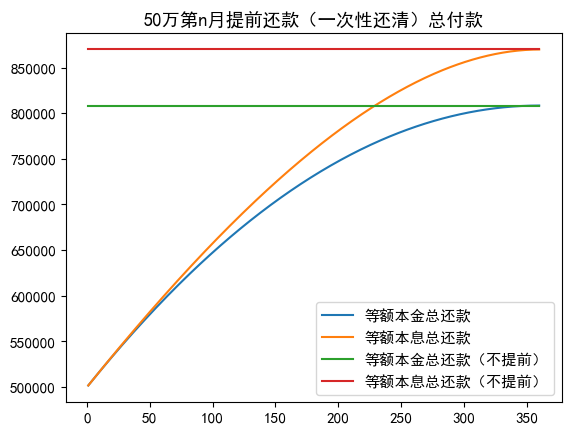

In [62]:
def calc_prepayment_total(epp_monthly_info):
    return epp_monthly_info['已还总额']+epp_monthly_info['剩余本金']
epp_total_payment_list= list(map(lambda x: calc_prepayment_total(x),eppList50))
elp_total_payment_list=list(map(lambda x: calc_prepayment_total(x),elpList50))
fig,ax=plt.subplots()
ax.plot(range(1,361),epp_total_payment_list,label='等额本金总还款')
ax.plot(range(1,361),elp_total_payment_list,label='等额本息总还款')
ax.plot(range(1,361),[mortgageCalc.MortgageCalc.total_payment(eppList50)['总还款']]*360,label='等额本金总还款（不提前）')
ax.plot(range(1,361),[mortgageCalc.MortgageCalc.total_payment(elpList50)['总还款']]*360,label='等额本息总还款（不提前）')
ax.legend()
ax.set_title('50万第n月提前还款（一次性还清）总付款')



Text(0.5, 1.0, '100万第n月提前还款（一次性还清）总付款')

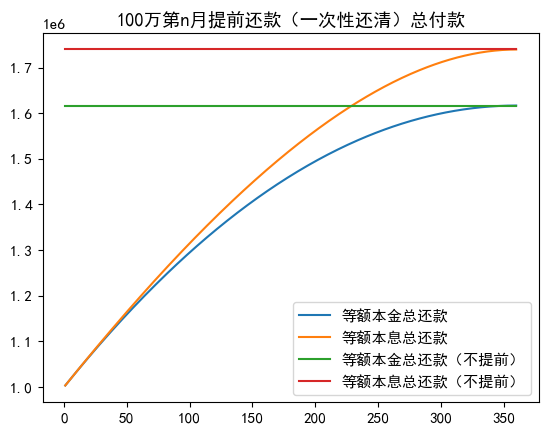

In [63]:
epp_total_payment_list= list(map(lambda x: calc_prepayment_total(x),eppList100))
elp_total_payment_list=list(map(lambda x: calc_prepayment_total(x),elpList100))
fig,ax=plt.subplots()
ax.plot(range(1,361),epp_total_payment_list,label='等额本金总还款')
ax.plot(range(1,361),elp_total_payment_list,label='等额本息总还款')
ax.plot(range(1,361),[mortgageCalc.MortgageCalc.total_payment(eppList100)['总还款']]*360,label='等额本金总还款（不提前）')
ax.plot(range(1,361),[mortgageCalc.MortgageCalc.total_payment(elpList100)['总还款']]*360,label='等额本息总还款（不提前）')
ax.legend()
ax.set_title('100万第n月提前还款（一次性还清）总付款')

经过上面曲线的绘制，我们可以发现，提前还贷，不考虑违约金和钱在你手中理财的收益的情况下，提前还贷一定是赚的  
但是越到后期，提前还贷的收益也就越少。 以贷款50万为例，等额本金在200期(约16年)左右的时候，提前还贷，能省5万（本金的十分之一）。之后则是小于5万  
这之后提前还款收益就很小了  
等额本息的情况下，节省5万的这个节点更晚，但是等额本息本身利息就更多。  
下面我们计算一下利息，然后综合一下

In [64]:
eppTotalInterest=mortgageCalc.MortgageCalc.total_payment(eppList50)['总利息']
elpTotalInterest=mortgageCalc.MortgageCalc.total_payment(elpList50)['总利息']
eppList50df['剩余利息']= eppTotalInterest-eppList50df['已付利息']
elpList50df['剩余利息']= elpTotalInterest-elpList50df['已付利息']
eppList50df.round(2)


,本期本金,本期利息,本期还款,剩余本金,已还本金,已付利息,已还总额,剩余利息
0,1388.89,1708.33,3097.22,498611.11,1388.89,1708.33,3097.22,306645.83
1,1388.89,1703.59,3092.48,497222.22,2777.78,3411.92,6189.70,304942.25
2,1388.89,1698.84,3087.73,495833.33,4166.67,5110.76,9277.43,303243.40
3,1388.89,1694.10,3082.99,494444.44,5555.56,6804.86,12360.42,301549.31
4,1388.89,1689.35,3078.24,493055.56,6944.44,8494.21,15438.66,299859.95
...,...,...,...,...,...,...,...,...
355,1388.89,23.73,1412.62,5555.56,494444.44,308306.71,802751.16,47.45
356,1388.89,18.98,1407.87,4166.67,495833.33,308325.69,804159.03,28.47
357,1388.89,14.24,1403.13,2777.78,497222.22,308339.93,805562.15,14.24
358,1388.89,9.49,1398.38,1388.89,498611.11,308349.42,806960.53,4.75


In [65]:
elpList50df

,本期本金,本期利息,本期还款,剩余本金,已还本金,已付利息,已还总额,剩余利息
0,707.658522,1708.333333,2415.991856,500000.000000,0.000000,1708.333333,1708.333333,370456.499975
1,710.076355,1705.915500,2415.991856,499292.341478,707.658522,3414.248833,4121.907356,368750.584475
2,712.502450,1703.489406,2415.991856,498582.265122,1417.734878,5117.738239,6535.473117,367047.095069
3,714.936833,1701.055022,2415.991856,497869.762673,2130.237327,6818.793262,8949.030589,365346.040047
4,717.379534,1698.612322,2415.991856,497154.825840,2845.174160,8517.405583,11362.579744,363647.427725
...,...,...,...,...,...,...,...,...
355,2375.138362,40.853494,2415.991856,11957.120108,488042.879892,369675.082309,857717.962201,2489.751000
356,2383.253418,32.738438,2415.991856,9581.981746,490418.018254,369707.820746,860125.839000,2457.012562
357,2391.396200,24.595655,2415.991856,7198.728328,492801.271672,369732.416402,862533.688073,2432.416907
358,2399.566804,16.425051,2415.991856,4807.332128,495192.667872,369748.841453,864941.509325,2415.991856


In [99]:
# fig,ax=plt.subplots()
# ax.plot(range(1,361),eppList50df['剩余利息'],label='等额本金剩余利息')
# ax.plot(range(1,361),elpList50df['剩余利息'],label='等额本息剩余利息')
# ax.legend()
# ax.set_title('50万第n月剩余利息')

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1,361)),y=eppList50df['剩余利息'],name='等额本金'))
fig.add_trace(go.Scatter(x=list(range(1,361)),y=elpList50df['剩余利息'],name='等额本息'))
# fig.update_layout({
#     'title': '50万第n月剩余利息',
#     'xaxis':{
#         'title':'月数'
#     },
#     'yaxis':{
#         'title':'金额'
#     }
# })
fig.update_layout(title='50万第n月剩余利息',xaxis_title='月数',yaxis_title='金额',  font=dict(
        family="SimHei",
        size=12,
        color="#7f7f7f",
),
hovermode='x'
)
fig.show()


In [126]:
pd.options.plotting.backend='plotly'
fig=eppList50df['剩余利息'].plot(title='50万第n月剩余利息', kind='line',labels=dict(index='月数',value='金额',variable='还款方式'))
# fig.update_yaxes(tickprefix="$")
fig.show()





总的来说，我们可以看出，最后10年就没什么利息了。  
利息都是前期还的多，后期还的少，并且等额本息还的利息更多。  
所以提前还贷的情况，大部分的情况都应该选择等额本金